In [1]:
import psycopg2
from pandas.io.sql import read_sql

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
pgconn = psycopg2.connect(
    database="sustainablecorn", host="iemdb", user="nobody"
)
site = "STJOHNS"
df = read_sql(
    """
    SELECT o.valid, o.plotid, o.discharge_mm as discharge_mm,
    lag(o.discharge_mm) OVER (PARTITION by o.plotid ORDER by o.valid ASC) as discharge_mm_lag,
    t.depth_mm as depth_mm, lag(t.depth_mm) OVER (PARTITION by o.plotid ORDER by o.valid ASC)
    as depth_mm_lag from tileflow_data o JOIN watertable_data t
    on (date_trunc('minute', o.valid) = date_trunc('minute', t.valid)
        and  t.plotid = o.plotid ) WHERE o.uniqueid = %s and
    discharge_mm is not null and depth_mm is not null ORDER by plotid ASC, valid ASC
""",
    pgconn,
    params=(site,),
)
print(len(df.index))

225899


'\nH, xedges, yedges = np.histogram2d( df[\'depth_mm\'], df[\'discharge_mm\'], 50)\nH = np.ma.array(H)\nH.mask = np.ma.where(H < 1, True, False)\n\nres = ax[1].pcolormesh(xedges, yedges, H.transpose(),\n                     cmap=plt.get_cmap("jet"))\nax[1].grid(True)\nfig.colorbar(res)\n'

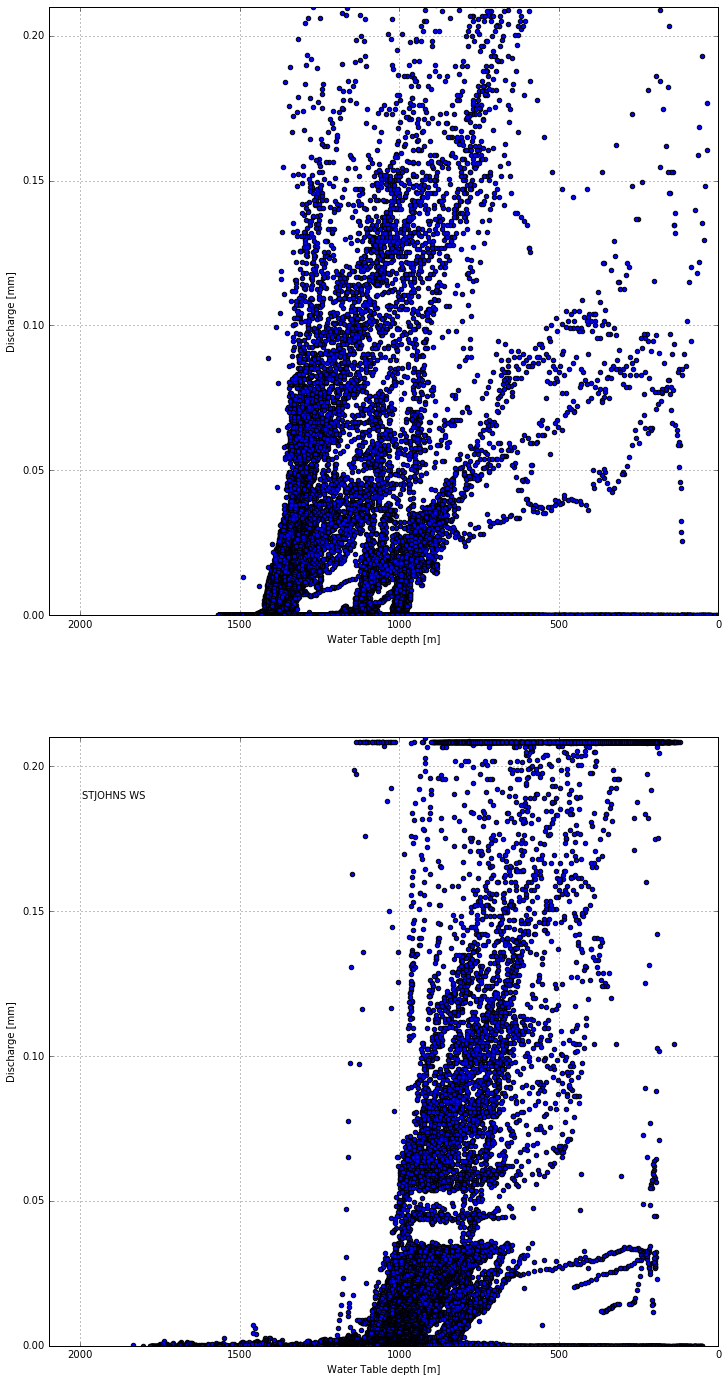

In [4]:
(fig, ax) = plt.subplots(2, 1, figsize=(12, 24))

plots = df["plotid"].unique()
plots.sort()
for i, plotid in enumerate(plots):
    df2 = df[(df["plotid"] == plotid) & (df["depth_mm"] > df["depth_mm_lag"])]
    ax[i].scatter(df2["depth_mm"], df2["discharge_mm"])
    ax[i].set_ylabel("Discharge [mm]")
    ax[i].grid(True)
    ax[i].set_ylim(0, 0.21)
    ax[i].set_xlim(2100, 0)
    ax[i].text(0.05, 0.9, "%s %s" % (site, plotid), transform=ax[1].transAxes)
    ax[i].set_xlabel("Water Table depth [m]")

"""
H, xedges, yedges = np.histogram2d( df['depth_mm'], df['discharge_mm'], 50)
H = np.ma.array(H)
H.mask = np.ma.where(H < 1, True, False)

res = ax[1].pcolormesh(xedges, yedges, H.transpose(),
                     cmap=plt.get_cmap("jet"))
ax[1].grid(True)
fig.colorbar(res)
"""

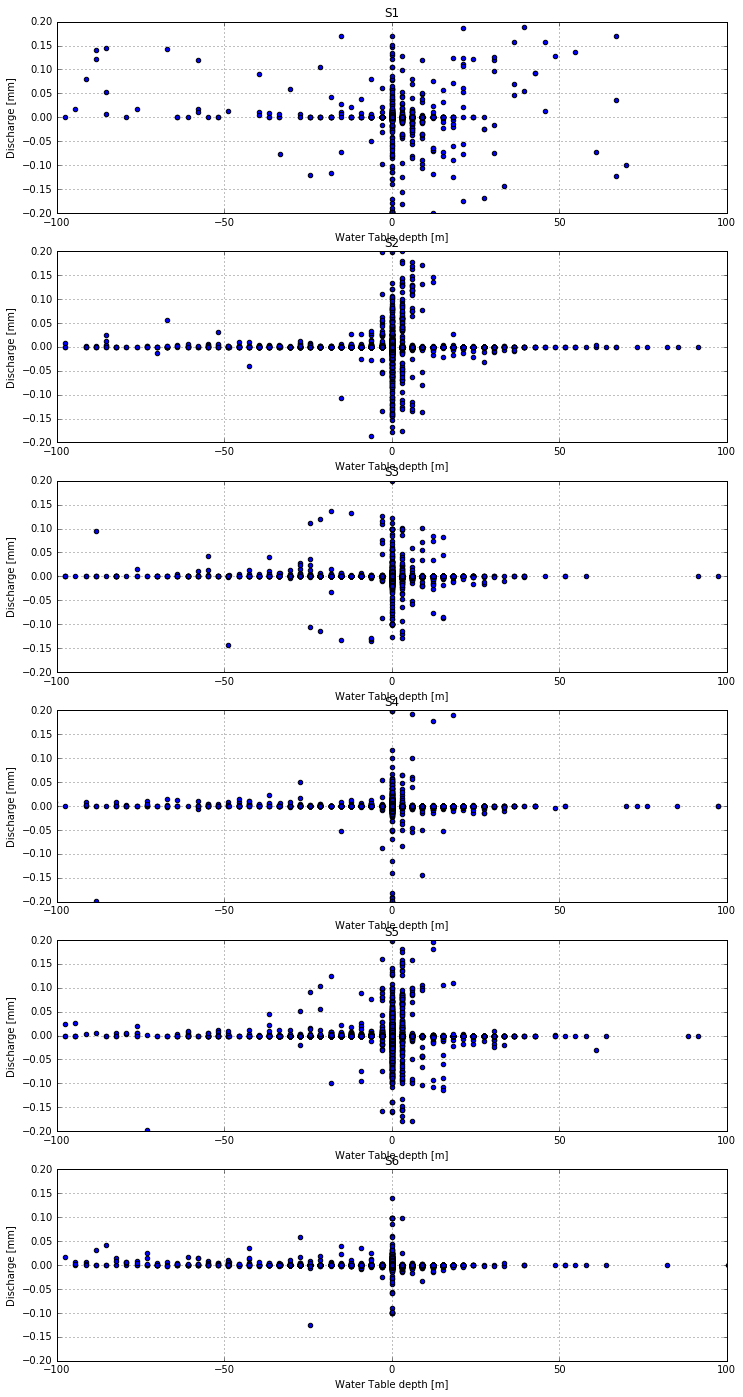

In [60]:
(fig, ax) = plt.subplots(6, 1, figsize=(12, 24))

plots = df["plotid"].unique()
plots.sort()
for i, plotid in enumerate(plots):
    df2 = df[(df["plotid"] == plotid)]
    ax[i].scatter(
        df2["depth_mm"] - df2["depth_mm_lag"],
        df2["discharge_mm"] - df2["discharge_mm_lag"],
    )
    ax[i].set_ylabel("Discharge [mm]")
    ax[i].grid(True)
    ax[i].set_ylim(-0.2, 0.2)
    ax[i].set_xlim(-100, 100)
    ax[i].set_title(plotid)
    ax[i].set_xlabel("Water Table depth [m]")